<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---


#<center>$Laboratorio \ 07$

**Curso:** *Computacón Gráfica*

**Tema:** *Triangulación de Delaunay en 3D*

**Profesora:** *Paccotacya Yanque, Rosa Yuliana Gabriela*

**Alumnos:**

*   *Nifla Llallacachi, Manuel Angel*
*   *Montoya Choque, Leonardo*
*   *Caceres Cuba Jayan*

**INFORME:**  [LINK](https://drive.google.com/file/d/1bq4GebR3gQ7SaGpy8TwkJIdQ62aSPx24/view?usp=sharing)



---



##*DATA*

Se usó los puntos escaneados de un cubo rubik.

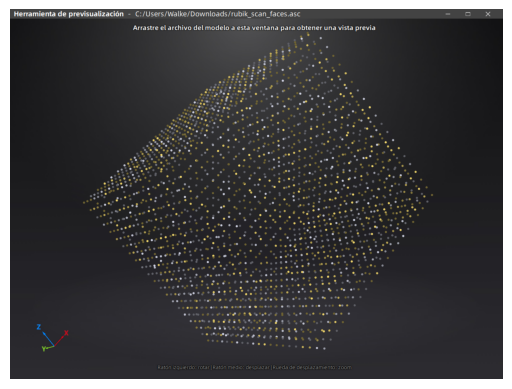

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Reemplaza 'ruta_de_tu_imagen.jpg' con la ruta de tu imagen
img = Image.open('scan.png')
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()




---



##*CODIGO*

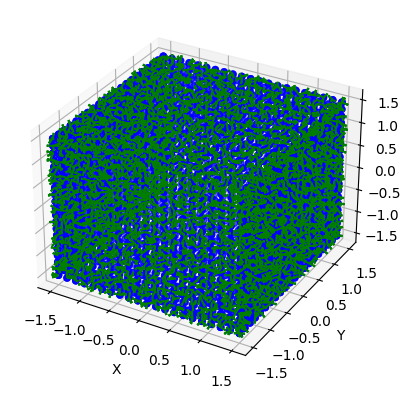

In [ ]:
# Paso 2: Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paso 3: Leer los datos del archivo .asc
file_path = 'rubik_scan_faces.asc'  # Actualiza esta ruta con la ubicación de tu archivo

data = np.loadtxt(file_path)

# Separar las coordenadas y los vectores normales
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
nx = data[:, 3]
ny = data[:, 4]
nz = data[:, 5]

# Paso 4: Visualizar los puntos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')

# Paso 5: Opcional - Añadir vectores normales
ax.quiver(x, y, z, nx, ny, nz, length=0.1, color='g')

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()




---


##*MALLA*

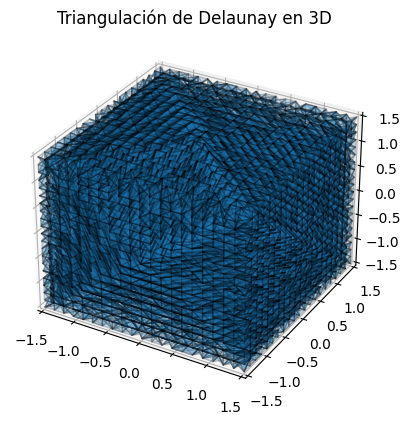

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay

# Función para leer los puntos desde un archivo .asc
def leer_puntos_desde_archivo(archivo):
    puntos = []
    with open(archivo, 'r') as file:
        for linea in file:
            partes = linea.split()
            x, y, z = map(float, partes[:3])  # Tomar solo los tres primeros valores
            puntos.append([x, y, z])
    return np.array(puntos)

# Ruta del archivo .asc
archivo_asc = 'rubik_scan_faces.asc'

# Leer los puntos desde el archivo
puntos = leer_puntos_desde_archivo(archivo_asc)

# Realizar la triangulación de Delaunay
triangulacion = Delaunay(puntos)

# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Añadir los tetraedros a la figura
for simplex in triangulacion.simplices:
    ax.add_collection3d(Poly3DCollection([puntos[simplex]], alpha=0.2, edgecolor='k'))

# Ajustar los límites de los ejes
ax.set_xlim(np.min(puntos[:, 0]), np.max(puntos[:, 0]))
ax.set_ylim(np.min(puntos[:, 1]), np.max(puntos[:, 1]))
ax.set_zlim(np.min(puntos[:, 2]), np.max(puntos[:, 2]))

# Título del gráfico
plt.title('Triangulación de Delaunay en 3D')

# Mostrar el gráfico
plt.show()
